<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Tarea 1</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Fransisco Mena</h3>
    <h3 align="center">Camilo Sanchez Bravo</h3>
    <h3 align="center">201673586-0</h3>
    <h3 align="center">Gabriel Vergara Donoso</h3>
    <h3 align="center">201673605-0</h3>
    <h3 align="center">Octubre 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

<a id="primero"></a>
## 1.  Máquinas de aprendizaje aplicadas a la medicina

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

c:\users\camiloo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\camiloo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\camiloo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if s

a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).

In [2]:
df.head()
#df.info()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


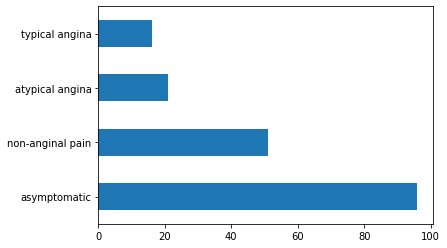

In [3]:
df50=df[df['age'] > 50]
df50['chest_pain'].value_counts().plot(kind='barh')

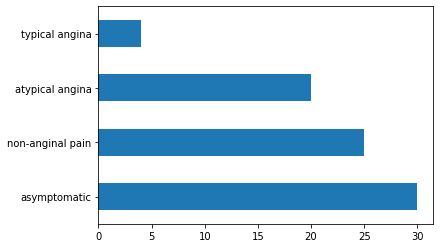

In [4]:
df49=df[df['age'] < 50]
df49['chest_pain'].value_counts().plot(kind='barh')

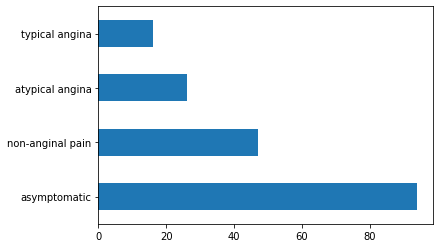

In [5]:
df1=df[df['sex'] == 'male']
df1['chest_pain'].value_counts().plot(kind='barh')

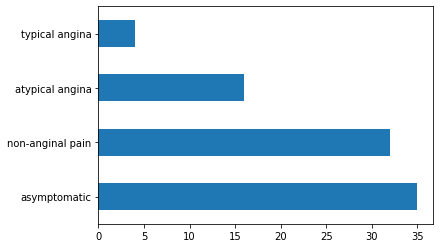

In [6]:
df2=df[df['sex'] == 'female']
df2['chest_pain'].value_counts().plot(kind='barh')

In [7]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


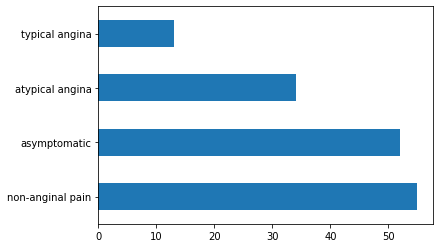

In [8]:
dfh=df[df['max_heart'] > 149]
dfh['chest_pain'].value_counts().plot(kind='barh')

Se puede notar que tanto hombres como mujeres presentan una distribución de enfermedades similar, además al separar la muestra por edades la distribucion presenta la misma similitud. Al analizar la frecuencia cardiaca se puede notar que la distribución cambia cuando se analizan las muestras con valores sobre el promedio de la frecuencia.

b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como one hot vectors, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**

In [9]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


Es importante, ya que el algoritmo no incluye strings como entrada por lo que para entrenar el modelo es necesario cambiar los valores categóricos a numericos necesitados para la regresión lineal.

### Predecir la presión sanguínea

c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos interesará predecir en esta instancia (*target*) con un modelo de regresión lineal.

In [10]:
#df.info()
class_label = df.pop('normal').values -1   # 0 means absence, 1 means presence
reg_label = df.pop('blood_p').values
X_data = df.values

In [11]:
nombre_variables = df.columns

d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.

In [12]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
#Datos
X_train = X_data[~mask_test] 
X_test = X_data[mask_test]
#variable a predecir
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
#clases
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

In [14]:
#Xstd_train

Se normalizan para llevar los datos a una escala común. Esto porque inicialmente están en diferentes escalas lo que lleva a los pesos a depende de estas escalas, y al tenerlos en una escala común es más sencillo analizar los pesos conseguidos.

f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

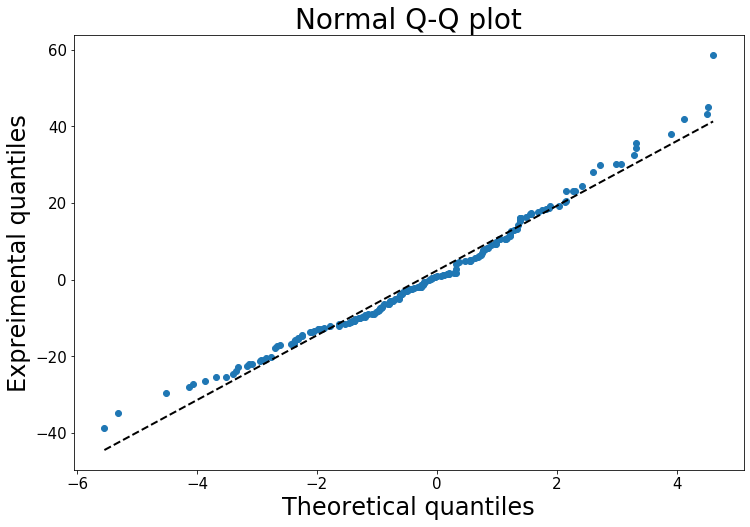

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

#error de predicción/residuo
reg_dif_train = reg_label_train - reg_pred_train

reg_dif_train.sort()
norm=np.random.normal(0,2,len(reg_dif_train))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,reg_dif_train,"o")

z = np.polyfit(norm,reg_dif_train, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=15)
plt.show()

Es razonable observando el Q-Q plot que los residuos están distribuidos normalmente. Es importante esta hipótesis ya que para varios análices se basan en la hipítesis de normalidad para que los resultados sean fiables.

g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

In [16]:
sigma = reg_dif_train.std()
sigma = sigma**2
mean_x = [0]*len(Xstd_train[0])
for i in Xstd_train:
    mean_x = mean_x + i
mean_x = mean_x/len(Xstd_train) #vector con la media para cada atributo/variable
mean_y = reg_label.mean() #media de la variable a predicir


In [17]:
pesos = model.coef_
cantidad = len(pesos)
cant = len(Xstd_train)

#calculo de z-score 
i = 0
aux=0
suma_sup = [0]*cantidad
suma_inf = [0]*cantidad
while (i<cant):
    aux = Xstd_train[i]-mean_x
    suma_sup = (aux)*(reg_label[i]-mean_y)
    suma_inf = aux**2
    i=i+1
#print(suma_inf)
suma_inf = suma_inf**0.5
#print(suma_inf)
Z_score = np.abs(pesos*(sigma*suma_sup/suma_inf))

#calculo F-score
SSR_aux = Xstd_train*pesos
media = reg_label_train.mean()
SSR = [0] * cantidad
SSE = [0] * cantidad
i=0
for x in SSR_aux:
    SSR = SSR + (x-media)**2
    SSE = SSE + (x-reg_label_train[i])**2
    i = i + 1
p_2 = SSR/SSE
F_score = ((cantidad-2)*p_2)/(1-p_2)

#creacion de la tabla
tabla = {"Atributo":nombre_variables,"Peso":pesos,"Z-score":Z_score, "F-score":F_score}
tabla = pd.DataFrame(tabla)
tabla = tabla.sort_values(by=["Z-score"],ascending=False)
print("Orden de los atributos según su Z-score")
print(tabla)


Orden de los atributos según su Z-score
                                Atributo      Peso       Z-score      F-score
0                                    age  3.703575  28216.342733  1333.608349
3                                oldpeak  3.398092  25888.963425  1280.239773
1                                  serum  2.192226  16701.866781  1235.496149
13         electro_ST-T wave abnormality  2.150000  16380.154292  1225.980067
4                                 vessel -1.798951  13705.623926  1163.503977
12           blood_s_lower than 120mg/ml -1.486991  11328.905031  1212.721945
11         blood_s_greater than 120mg/ml  1.486991  11328.905031  1212.721945
18                     slope_downsloping  1.286419   9800.812721  1208.086902
10             chest_pain_typical angina  1.146328   8733.503216  1188.639918
9            chest_pain_non-anginal pain -1.089938   8303.887688  1186.904150
5                             sex_female  1.069432   8147.655160  1195.043841
6                       

Si se hace un ranking en base a los pesos, se puede notar que los más "influyentes" son los que tienen mayores pesos, lo que muestra también con el Z-score y F-score (con algunas variaciones en el ranking entre Z-score y F-score, los que deberían dar el mismo ranking).En este caso se ve como la edad la variable más influyente para predecir la presión del corazón, seguido de 'oldpeak' y suero ('serum), lo cuál en cuanto a la edad puede tener sentido ya que al envejecer el cuerpo comienza a fallar en su funcionamiento.

h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_absolute_error(reg_label_test, reg_pred_test))


MSE train:  12.520139292308562
MSE test:  13.66061335199971


Se puede notar que el error de entrenamiento es alrededor de una unidad menor que el error en los casos de pruebas, lo que es un buen indicativo de que el sistema no ha sufrido sobreajuste ya que el error medio en ambos conjuntos son similares. Sobre el valor de estos, para interpretar si son buenos o malos habría que analizar como se distribuyen los datos de la presión en la sangre, donde si el cuociente entre el error y la desviación estandar de los datos es cercana a 1, se considerarían buenas. Aún así en un caso práctico, por la rápidez de predecir la presión en la sangre si la predicción cae en un rango saludable, fuera de riesgo, serviría para ahorrar tiempo en medir directamente la presión en esos casos mientras que si están cercano a un rango riesgoso funcionaría para elegir a que sujetos medir la presión directamente.

i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.

In [19]:
from sklearn.model_selection import KFold
#K= 2 (no acepta 1, el mínimo es 2)
K=2
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv1 = mse_cv / K

#K=5
K=5
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv5 = mse_cv / K




j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 

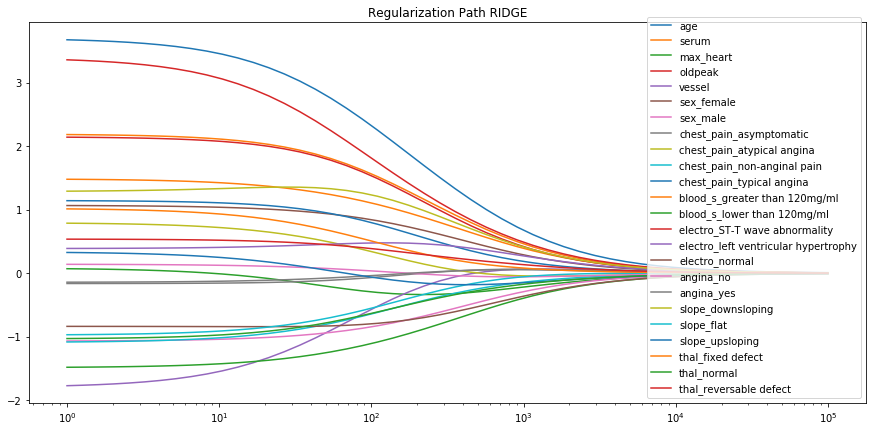

In [20]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

Se observa que a mayor valor de lambda, más se acercan los coeficientes a 0. Esto debido que a mayor lambda, mayor error es permitido por lo que más "poda" variables. Se puede notar que los valores mas lejanos a 0 en general se "demoran" más en acercarse a 0, aunque se pueden notar expeciones como "vessel" que en el ranking anterior toma un valor alto en el ranking, pero se nota que es unos de los primeros atributos en ser podados, indicando que por realmente no era tan importante como parecía.

k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

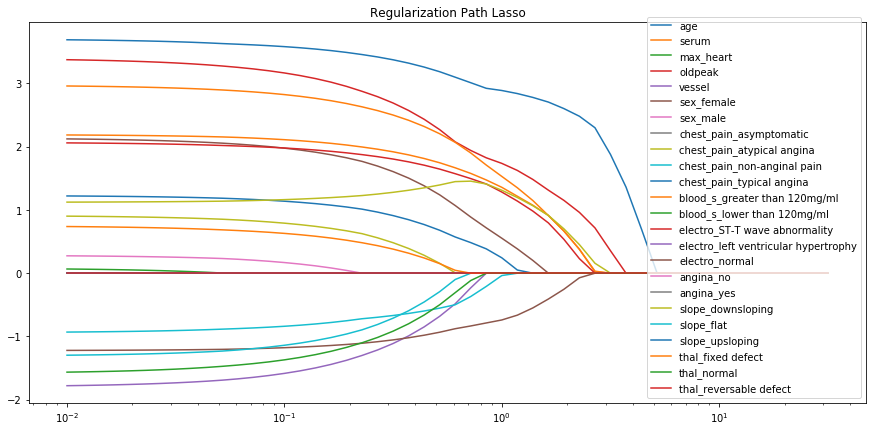

In [21]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(1.5,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='lower right')
plt.show()

Al igual que en el caso de RIDGE, se nota que a mayor valor de lambda más atributos se acercan a 0 y es por la misma razón que la regularización l2. Pero al contrario de Ridge, en este caso efectivamente los pesos de los atributos se hacen 0 lo que rapidamente serviría para descartar atributos ya que un peso 0 no afecta la regresión.

l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?

In [22]:
from ipywidgets import interactive
def train_model(param):
    model = Ridge(fit_intercept=True, solver='svd')#define the model (Ridge and Lasso)Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
    
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

In [23]:
def train_modelL(param):
    model = Lasso(fit_intercept=True)#define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
    
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_modelL, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

En el caso de Ridge usaría alpha valor 1 y en el caso de Lasso un alpha de -1. Esto porque en ambos casos son los alphas que disminuyen el error de prueba, ya que es que nos interesa al ser datos no usados para entrenar.

m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

In [24]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected

features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]

AttributeError: 'range' object has no attribute 'remove'

n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?

### Detectar una enfermedad 

p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.

In [124]:
mask_norm = class_label_train == 0 
model = LinearRegression(fit_intercept=True)#choose yor model..
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test)

q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).

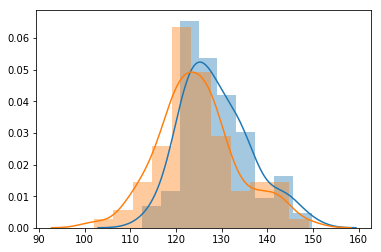

In [139]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, 148, 114) #148:valor promedio mas desviacion
pred_test = predict_umbr(blood_p_te, 148, 114) #114:valor promedio menos desviacion

r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*

In [141]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.592391304347826
Score test:  0.5813953488372093


s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.

In [142]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.8695652173913043
Score test:  0.8023255813953488


C:\Users\gverg\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).

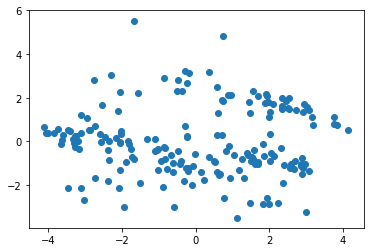

In [143]:
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()

u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente

v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente